# Lab3 数字图像分割与边缘检测实验
**Author: Gao Pengbing (nbgao)**  
**Email: nbgao@126.com**

# Work1 使用一阶和二阶检测算子（导数）进行图像的边缘检测
**Work1-P1 编写程序实现一阶Sobel算子，进行图像的边缘提取**  
**Work1-P2 编写程序实现一阶Prewitt算子，进行图像的边缘提取**  
**Work1-P3 编写程序实现一阶Roberts算子，进行图像的边缘提取**  
**Work1-P4 编写程序实现二阶Laplacian算子(3*3)进行图像的边缘提取**  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import cv2
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

#### Sobel Operator

In [3]:
''' Sobel
Horizonal (X)
Gy =
-1 -2 -1
 0  0  0
 1  2  1

Vertical (Y)
Gx = 
-1 0 1
-2 0 2
-1 0 1
'''
def SobelFilter(I, orientation):
    [h, w] = I.shape[:2]
    G = np.zeros((h, w))
    # Filter
    K = np.ones((3,3))
    
    if(orientation in ['h', 'H', 'y', 'Y']):     # Horizon Edge Detect
        K = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    elif(orientation in ['v', 'V', 'x', 'X']):   # Verticle Edge Detect
        K = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

    for i in range(1,h-1):
        for j in range(1,w-1):
            T = I[i-1:i+2, j-1:j+2]
            G[i,j] = np.sum(T*K)
#             G[i,j] = np.abs(np.sum(T*K))
#             G[i,j] = 255 if G[i,j]>255 else G[i,j]
#     G[G>255] = 255
#     G = np.uint8(G)
#     取绝对值，大于255的置为255
    G = cv2.convertScaleAbs(G)
    return G

#### Prewitt Operator

In [4]:
''' Prewitt
Horizonal (X)
Gy =
-1 -1 -1
 0  0  0
 1  1  1

Vertical (Y)
Gx = 
-1 0 1
-1 0 1
-1 0 1
'''
def PrewittFilter(I, orientation):
    [h, w] = I.shape[:2]
    G = np.zeros((h, w))
    # Filter
    K = np.ones((3,3))
    
    if(orientation in ['h', 'H', 'y', 'Y']):     # Horizon Edge Detect
        K = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    elif(orientation in ['v', 'V', 'x', 'X']):   # Verticle Edge Detect
        K = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])    

    for i in range(1,h-1):
        for j in range(1,w-1):
            T = I[i-1:i+2, j-1:j+2]
            G[i,j] = np.sum(T * K)
    
    G = cv2.convertScaleAbs(G)
    return G

#### Roberts Operator

In [5]:
'''
Gx = 
1  0
0 -1
 
Gy = 
 0 1
-1 0
'''
def RobertsFilter(I, orientation):
    [h, w] = I.shape[:2]
    G = np.zeros((h, w))
    # Filter
    K = np.ones((2,2))
    
    if(orientation in ['l', 0]):
        K = np.array([[1, 0], [0, -1]])
    elif(orientation in ['r', 1]):
        K = np.array([[0, 1], [-1, 0]])
        
    for i in range(0, h-2):
        for j in range(0, w-2):
            T = I[i:i+2, j:j+2]
            G[i,j] = np.sum(T*K)
            
    G = cv2.convertScaleAbs(G)
    return G

#### Laplacian Operator

In [6]:
''' Laplacian
small
K = 
 0 -1  0
-1  4 -1
 0 -1  0

large
K = 
-1 -1 -1
-1  8 -1
-1 -1 -1 
'''
def LaplacianFilter(I, mode):
    [h, w] = I.shape[:2]
    G = np.zeros((h, w))
    # Filter
    K = np.ones((3,3))
    
    if(mode in ['4', 's', 4]):
        K = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
    elif(mode in ['8', 'l', 8]):
        K = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])    

    for i in range(1,h-1):
        for j in range(1,w-1):
            T = I[i-1:i+2, j-1:j+2]
            G[i,j] = np.sum(T * K)
    
    G = cv2.convertScaleAbs(G)
    return G

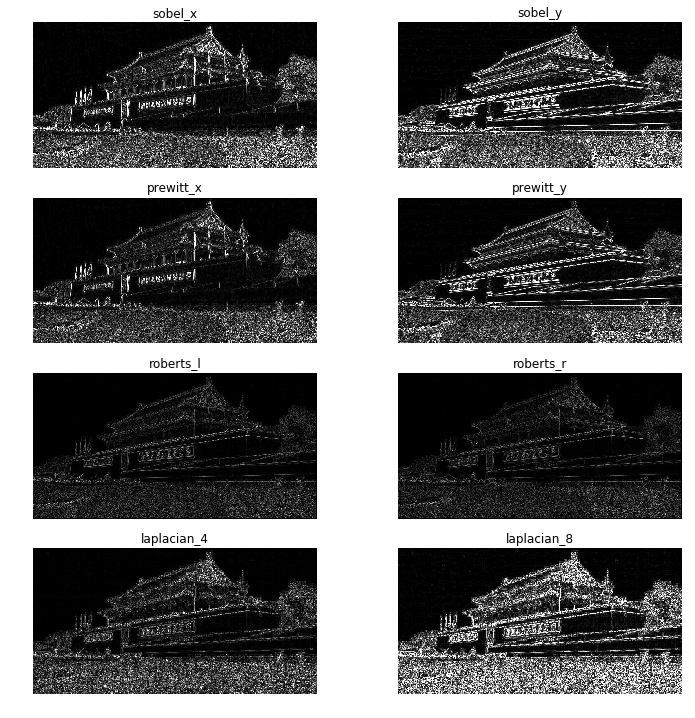

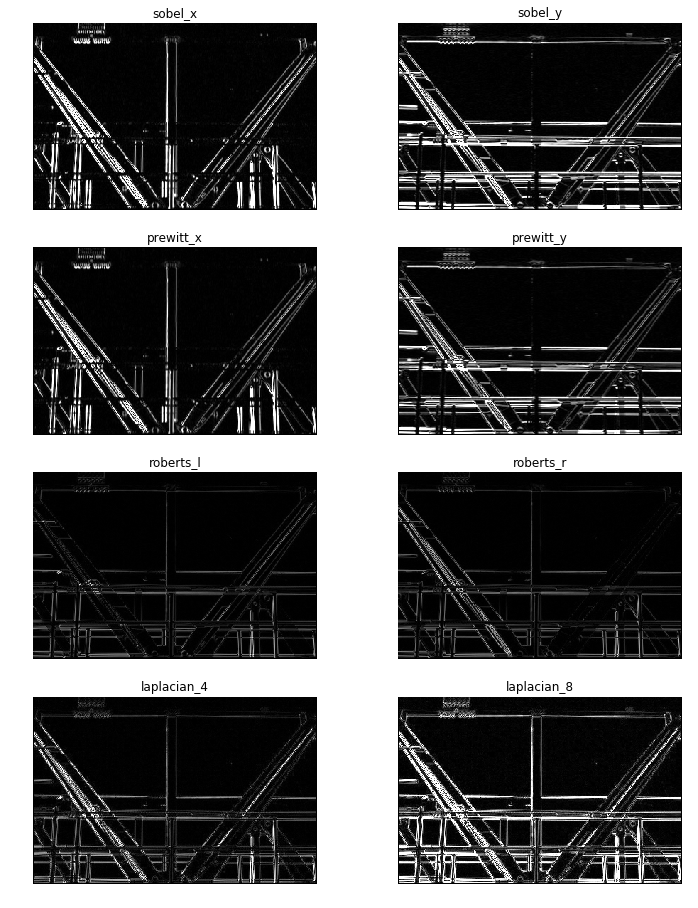

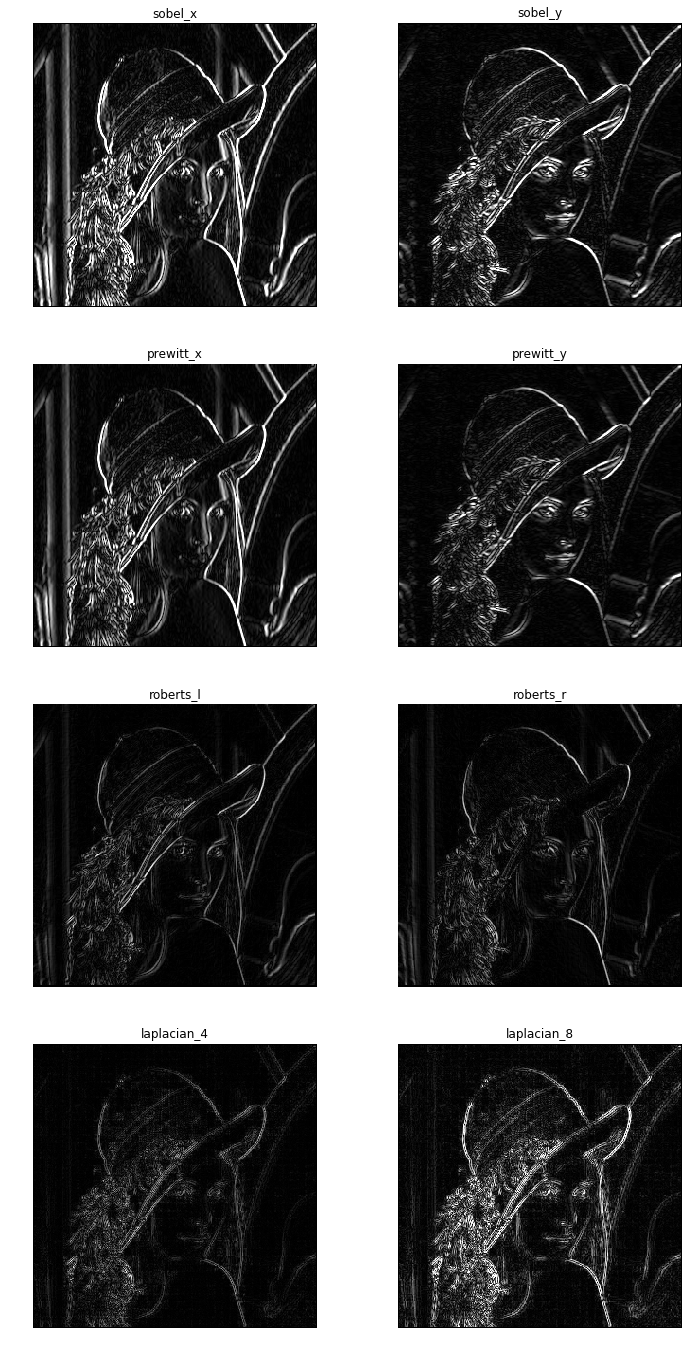

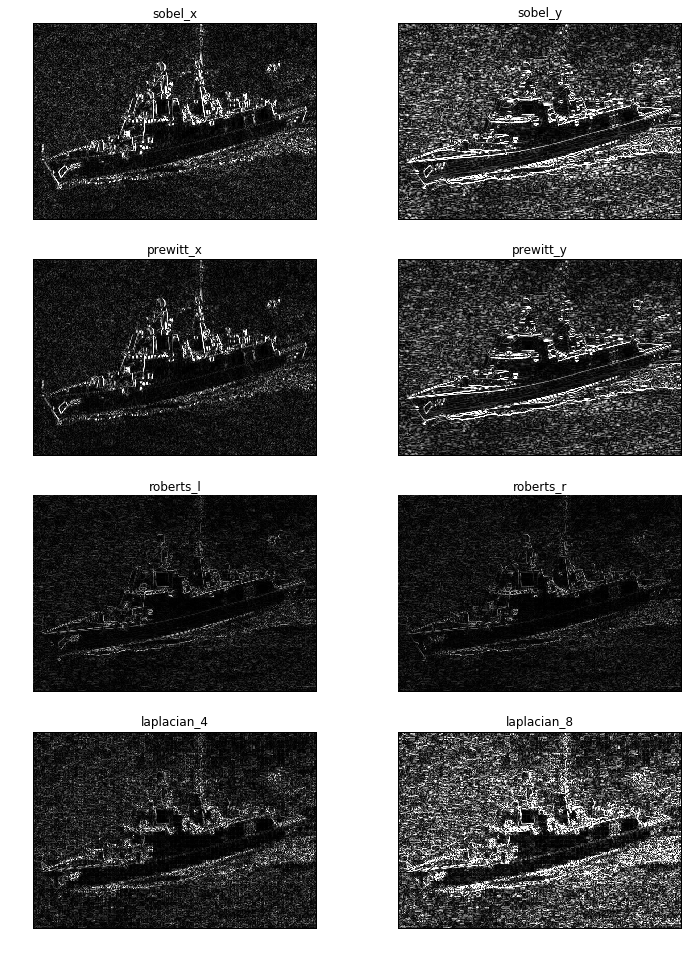

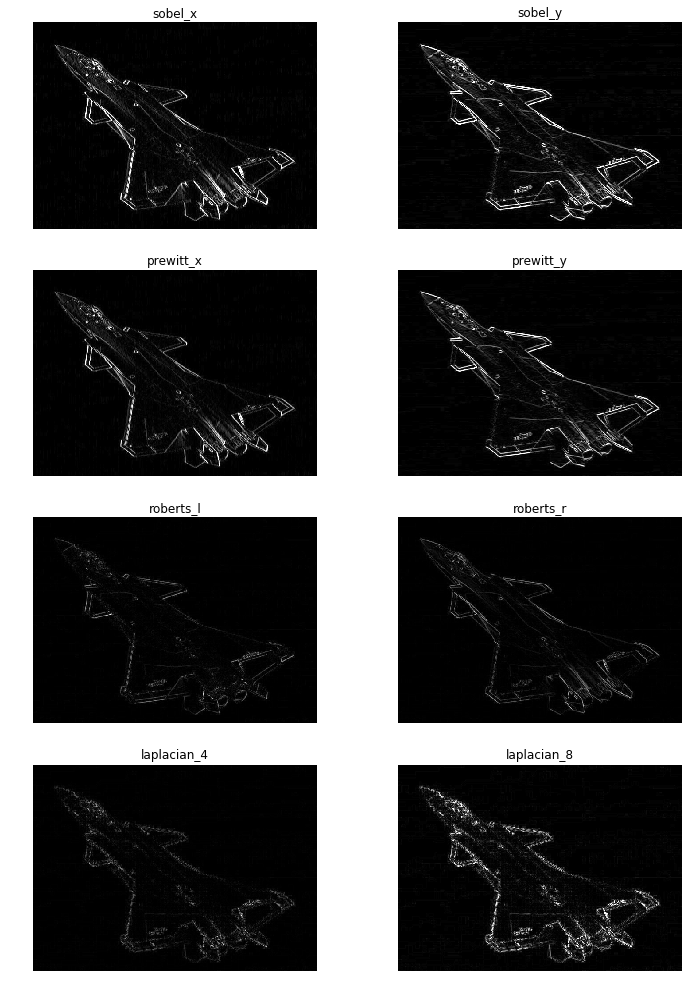

In [7]:
for i in range(1,6):
    file_path = '../Image/image'+str(i)+'.jpg'
    img = plt.imread(file_path)
    img_gray = np.uint8(skimage.color.rgb2gray(img)*255)
    
    img_sobel_x = SobelFilter(img_gray, 'x')
    img_sobel_y = SobelFilter(img_gray, 'y')
    
    img_prewitt_x = PrewittFilter(img_gray, 'x')
    img_prewitt_y = PrewittFilter(img_gray, 'y')
    
    img_roberts_l = RobertsFilter(img_gray, 'l')
    img_roberts_r = RobertsFilter(img_gray, 'r')
    
    img_laplacian_4 = LaplacianFilter(img_gray, '4')
    img_laplacian_8 = LaplacianFilter(img_gray, '8')
    
    plt.figure(figsize=(12, 4*6*img.shape[0]/img.shape[1]))
    plt.subplot(421)
    plt.imshow(img_sobel_x, 'gray')
    plt.title('sobel_x')
    plt.axis('off')
    
    plt.subplot(422)
    plt.imshow(img_sobel_y, 'gray')
    plt.title('sobel_y')
    plt.axis('off')
    
    plt.subplot(423)
    plt.imshow(img_prewitt_x, 'gray')
    plt.title('prewitt_x')
    plt.axis('off')
    
    plt.subplot(424)
    plt.imshow(img_prewitt_y, 'gray')
    plt.title('prewitt_y')
    plt.axis('off')
    
    plt.subplot(425)
    plt.imshow(img_roberts_l, 'gray')
    plt.title('roberts_l')
    plt.axis('off')
    
    plt.subplot(426)
    plt.imshow(img_roberts_r, 'gray')
    plt.title('roberts_r')
    plt.axis('off')
    
    plt.subplot(427)
    plt.imshow(img_laplacian_4, 'gray')
    plt.title('laplacian_4')
    plt.axis('off')
    
    plt.subplot(428)
    plt.imshow(img_laplacian_8, 'gray')
    plt.title('laplacian_8')
    plt.axis('off')
    
    plt.show()